In [1]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step


In [0]:
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 54kB/s 


In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
p_train = train_images[:40000]
p_train_labels = train_labels[:40000]

p_val = train_images[40000:]
p_val_labels = train_labels[40000:]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)

validationgen = ImageDataGenerator(rescale=1./255)

In [0]:
testdatagen = ImageDataGenerator(rescale=1./255)
testdatagen.fit(test_images)

In [0]:
datagen.fit(p_train)
validationgen.fit(p_val)

In [10]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(64, (2, 2), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (4, 4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (4, 4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (4, 4), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

W0711 08:34:02.351981 140288908519296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 08:34:02.394360 140288908519296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 08:34:02.408363 140288908519296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 08:34:02.482001 140288908519296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0711 08:34:02.483423 1402889085

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 64)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
__________

In [11]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0711 08:34:05.940662 140288908519296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
history = model.fit_generator(datagen.flow(p_train, p_train_labels, batch_size = 128),
                             steps_per_epoch=len(p_train)/128, validation_data=validationgen.flow(p_val, p_val_labels), validation_steps=len(p_val)/128, epochs = 25)

W0711 08:34:06.115542 140288908519296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
313/312 [==============================] - 56s 180ms/step - loss: 2.1573 - acc: 0.1668 - val_loss: 2.0663 - val_acc: 0.1922
Epoch 2/25
313/312 [==============================] - 50s 160ms/step - loss: 1.9722 - acc: 0.2045 - val_loss: 1.9134 - val_acc: 0.2267
Epoch 3/25
 45/312 [===>..........................] - ETA: 41s - loss: 1.9379 - acc: 0.2302

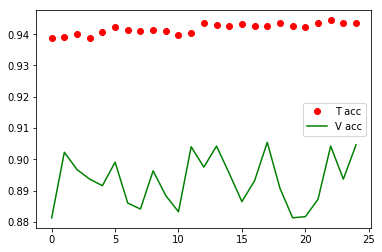

In [0]:
ha = history.history['acc']
va = history.history['val_acc']
epochs = range(len(ha))
plt.plot(epochs, ha, 'ro', label='T acc')
plt.plot(epochs, va, 'g', label='V acc')
plt.legend();

In [0]:
test_loss, test_acc = model.evaluate_generator(testdatagen.flow(test_images, test_labels, batch_size=128), steps=len(test_images)/128)

In [0]:
test_acc

0.901

In [0]:
model.save('cifar_datagen_90.1')